In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
#from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import DBSCAN,AgglomerativeClustering, KMeans

In [2]:
## read the facebook dataset 
df_facebook = pd.read_csv('facebook.csv', parse_dates=['status_published'])

In [3]:
df_facebook.shape

(7050, 12)

In [4]:
## we can observer there are three categorical variables 
## status_id, status_type and status_published
df_facebook.head(5)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0


In [5]:
df_facebook.dtypes

status_id                   object
status_type                 object
status_published    datetime64[ns]
num_reactions                int64
num_comments                 int64
num_shares                   int64
num_likes                    int64
num_loves                    int64
num_wows                     int64
num_hahas                    int64
num_sads                     int64
num_angrys                   int64
dtype: object

In [6]:
df_facebook.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [7]:
## it can be observed that status_id and status_publishes are both unique identifiers for each of the instance
## hence this variable can be used in our analysis so we can drop these variables from our dataset

df_facebook.describe(include=['object', 'datetime'])

<ipython-input-7-af95bd6ecd37>:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_facebook.describe(include=['object', 'datetime'])


,status_id,status_type,status_published
count,7050,7050,7050
unique,6997,4,6913
top,819700534875473_999880033524188,photo,2018-03-20 01:54:00
freq,2,4288,3
first,NaN,NaN,2012-07-15 02:51:00
last,NaN,NaN,2018-06-13 01:12:00


In [8]:
df_subset = df_facebook.drop(['status_id', 'status_published'], axis=1)

In [9]:
df_subset.head(5)

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [10]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


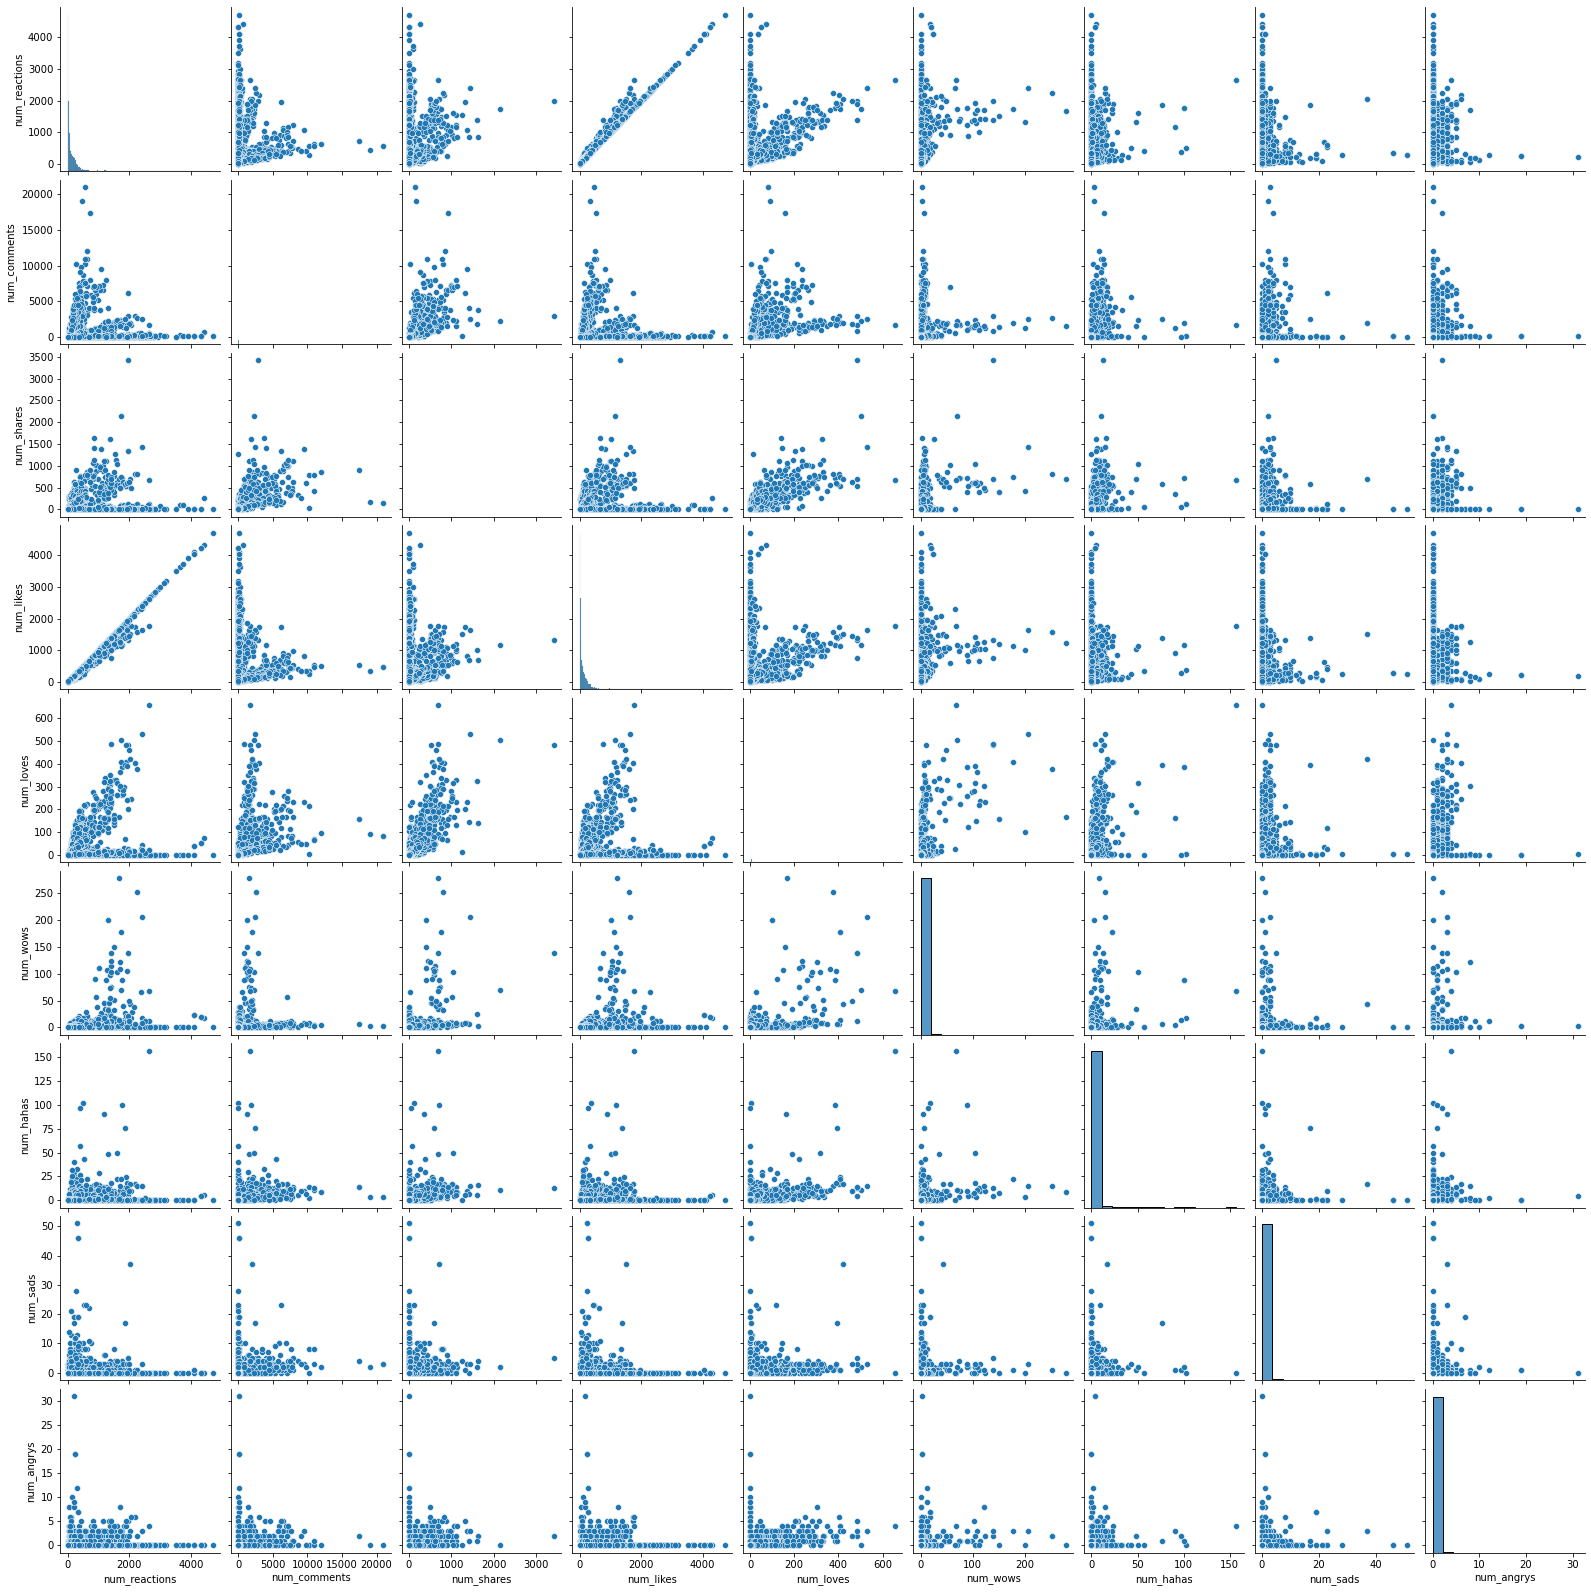

In [11]:
sns.pairplot(df_subset) # their exist a linear reaction b/w num_reactions and num_likes

<AxesSubplot:xlabel='status_type', ylabel='num_shares'>

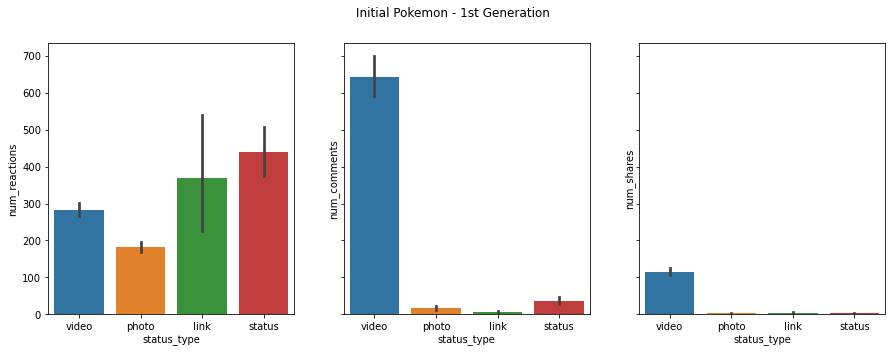

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Initial Pokemon - 1st Generation')
cols = df_subset.select_dtypes(include=['int64']).columns.tolist()
    
sns.barplot(x = df_subset.status_type, y = df_subset[cols[0]], ax=axes[0])
sns.barplot(x = df_subset.status_type, y = df_subset[cols[1]], ax=axes[1])
sns.barplot(x = df_subset.status_type, y = df_subset[cols[2]], ax=axes[2])


<AxesSubplot:xlabel='status_type', ylabel='num_wows'>

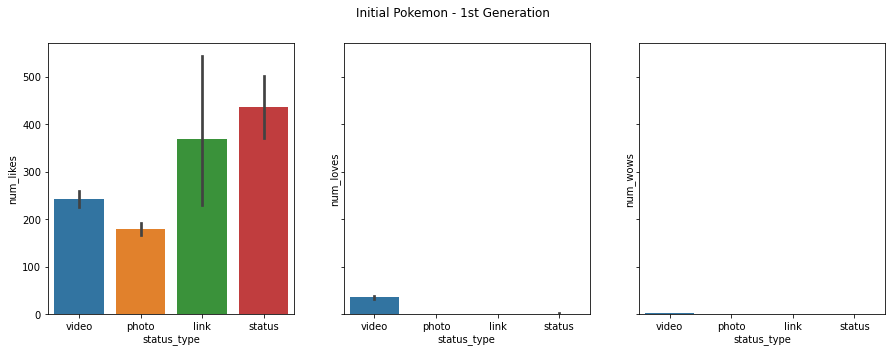

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Initial Pokemon - 1st Generation')
cols = df_subset.select_dtypes(include=['int64']).columns.tolist()
sns.barplot(x = df_subset.status_type, y = df_subset[cols[3]], ax=axes[0])
sns.barplot(x = df_subset.status_type, y = df_subset[cols[4]], ax=axes[1])
sns.barplot(x = df_subset.status_type, y = df_subset[cols[5]], ax=axes[2])

<AxesSubplot:xlabel='status_type', ylabel='num_angrys'>

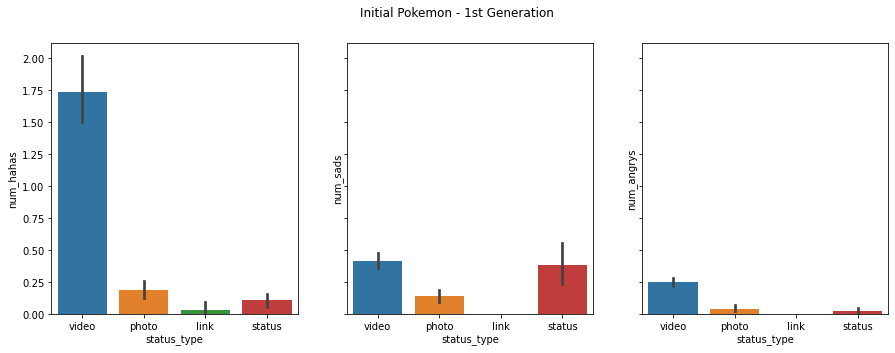

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Initial Pokemon - 1st Generation')
cols = df_subset.select_dtypes(include=['int64']).columns.tolist()
sns.barplot(x = df_subset.status_type, y = df_subset[cols[6]], ax=axes[0])
sns.barplot(x = df_subset.status_type, y = df_subset[cols[7]], ax=axes[1])
sns.barplot(x = df_subset.status_type, y = df_subset[cols[8]], ax=axes[2])

C:\Users\pjatthi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='status_type', ylabel='count'>

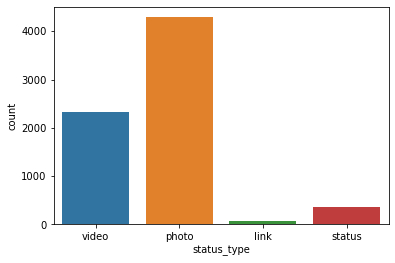

In [15]:
sns.countplot(df_subset.status_type)

In [16]:
X = df_subset
y = df_subset['status_type']

In [17]:
## label encoding the status_type
label_encode = LabelEncoder()
X['status_type'] = label_encode.fit_transform(X['status_type'])
y = label_encode.transform(y)

<AxesSubplot:>

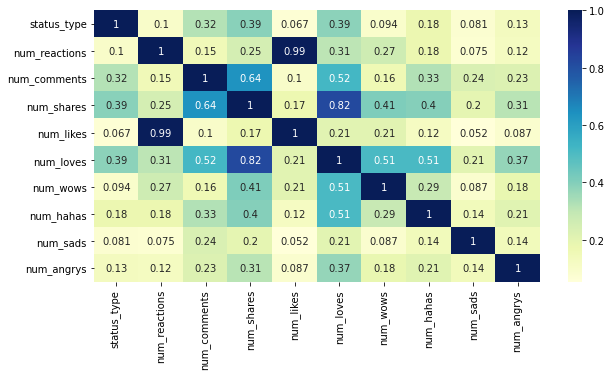

In [18]:
plt.figure(figsize=(10,5))
sns.heatmap(X.corr(), annot=True, cmap="YlGnBu")

In [19]:
#label_encode.inverse_transform(np.unique(y))

In [20]:
cols = X.columns
#scaler = MinMaxScaler()
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [21]:
X = pd.DataFrame(X, columns = [cols])

In [22]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.374288,0.646104,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,0.473570,-0.155748
1,-0.748106,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
2,1.374288,-0.006738,0.013089,0.129017,-0.024571,0.206938,-0.033187,0.076713,-0.152587,-0.155748
3,-0.748106,-0.257499,-0.252206,-0.304144,-0.231495,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
4,-0.748106,-0.037003,-0.252206,-0.304144,-0.024571,-0.093286,-0.147879,-0.176010,-0.152587,-0.155748


In [23]:
cluster = KMeans(n_clusters = 3, init = "random", n_init = 10, max_iter = 300, random_state = 42)
cluster.fit(X)

KMeans(init='random', n_clusters=3, random_state=42)

In [24]:
## it can be observed for the kmean s cluster the model inertia is very high 
## and higher the inertia the model is not a good fit 
cluster.inertia_

44932.66967671386

In [25]:
pred_labels = cluster.labels_

tp = sum(y == pred_labels)

print(tp)

325


In [26]:
## accuracy metrics 

tp/float(y.size) * 100

4.609929078014184

In [27]:
cluster.n_iter_

18

In [28]:
## we use the elbow method to find the optimal inertia 
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

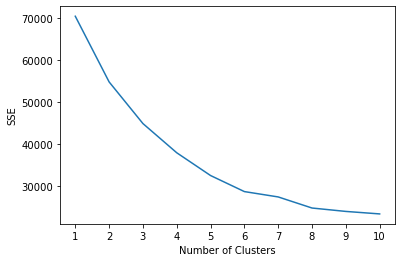

In [29]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [30]:
## k-means for k =2, 4,5,6
cluster_n_2 = KMeans(n_clusters=2, **kmeans_kwargs)
cluster_n_2.fit(X)

KMeans(init='random', n_clusters=2, random_state=42)

In [31]:
cluster_n_2.inertia_

54855.68745656181

In [32]:
pred_labels = cluster_n_2.labels_

tp = sum(y == pred_labels)

print(tp)

81


In [33]:
cluster_n_4 = KMeans(n_clusters=4, **kmeans_kwargs)
cluster_n_4.fit(X)

KMeans(init='random', n_clusters=4, random_state=42)

In [34]:
cluster_n_4.inertia_

37975.707104387126

In [35]:
pred_labels = cluster_n_4.labels_

tp = sum(y == pred_labels)

print(tp)

226


In [36]:
cluster_n_5 = KMeans(n_clusters=5, **kmeans_kwargs)
cluster_n_5.fit(X)

KMeans(init='random', n_clusters=5, random_state=42)

In [37]:
cluster_n_5.inertia_

32551.753317149287

In [38]:
pred_labels = cluster_n_5.labels_

tp = sum(y == pred_labels)

print(tp)

31


In [39]:
tp/float(y.size)

0.0043971631205673755

In [40]:
cluster_n_6 = KMeans(n_clusters=6, **kmeans_kwargs)
cluster_n_6.fit(X)

KMeans(init='random', n_clusters=6, random_state=42)

In [41]:
cluster_n_6.inertia_

28728.111705391006

In [42]:
pred_labels = cluster_n_6.labels_

tp = sum(y == pred_labels)

print(tp)

23


In [43]:
cluster_n_7 = KMeans(n_clusters=7, **kmeans_kwargs)
cluster_n_7.fit(X)

KMeans(init='random', n_clusters=7, random_state=42)

In [44]:
cluster_n_7.inertia_

27453.453931734388

In [45]:
pred_labels = cluster_n_7.labels_

tp = sum(y == pred_labels)

print(tp)

90


In [48]:
print(X.columns)

MultiIndex([(  'status_type',),
            ('num_reactions',),
            ( 'num_comments',),
            (   'num_shares',),
            (    'num_likes',),
            (    'num_loves',),
            (     'num_wows',),
            (    'num_hahas',),
            (     'num_sads',),
            (   'num_angrys',)],
           )


<AxesSubplot:>

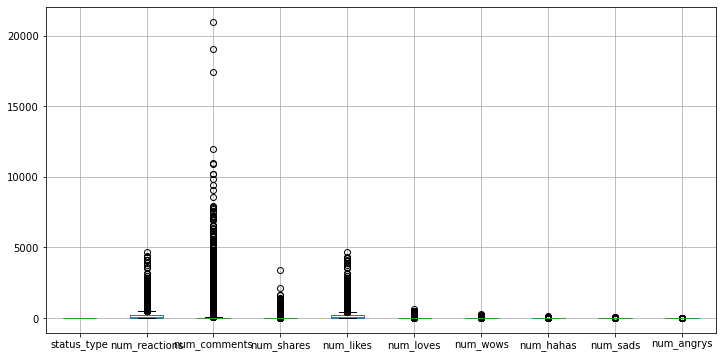

In [107]:
df_subset.boxplot(figsize=(12,6))

In [108]:
lower= df_subset.quantile(0.5)
upper= df_subset.quantile(0.95)
out_up= (df_subset > upper)
out_low = (df_subset < lower)
df_test = df_subset.mask(out_low, lower,axis=1)
df_test = df_subset.mask(out_up, lower,axis=1)

In [158]:
print('DENSITY BASED CLUSTERS \n ')
expectedNumber = 50 #Found from trying in above section for various values of K_NN_Expected
EPSILON = 0.75
DISTANCEMETRIC='cosine'
db_default = DBSCAN(eps = EPSILON, min_samples = expectedNumber, metric=DISTANCEMETRIC).fit(X) 
labels = db_default.labels_ 
print(labels)
cluster_labels_ = labels

DENSITY BASED CLUSTERS 
 
[0 0 0 ... 0 0 0]


In [159]:
df_facebook.loc[:,'cluster'] = cluster_labels_
output = df_facebook.groupby(['cluster']).agg(['mean'])
output

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster,,,,,,,,,
0,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191


Estimated number of clusters: 12
Estimated number of noise points: 1503
Homogeneity: 0.807
Completeness: 0.544
V-measure: 0.650
Adjusted Rand Index: 0.695
Adjusted Mutual Information: 0.649
Silhouette Coefficient: 0.349


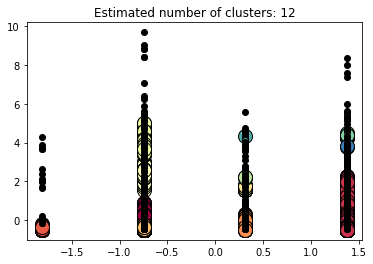

<Figure size 1440x720 with 0 Axes>

In [51]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
#X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
#                            random_state=0)

labels_true=y
X = StandardScaler().fit_transform(X)

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# Plot result
import matplotlib.pyplot as plt
%matplotlib inline

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.figure(figsize=(20,10))
plt.show()

Estimated number of clusters: 9
Estimated number of noise points: 577
Homogeneity: 0.938
Completeness: 0.714
V-measure: 0.811
Adjusted Rand Index: 0.871
Adjusted Mutual Information: 0.811
Silhouette Coefficient: 0.281


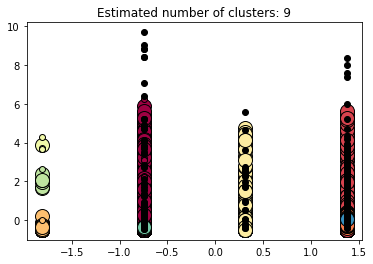

<Figure size 1440x720 with 0 Axes>

In [52]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
#X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
#                            random_state=0)

labels_true=y
X = StandardScaler().fit_transform(X)

# Compute DBSCAN
db = DBSCAN(eps=0.75, min_samples=5).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# Plot result
import matplotlib.pyplot as plt
%matplotlib inline

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.figure(figsize=(20,10))
plt.show()

Estimated number of clusters: 1
Estimated number of noise points: 167
Homogeneity: 0.012
Completeness: 0.093
V-measure: 0.021
Adjusted Rand Index: 0.018
Adjusted Mutual Information: 0.021
Silhouette Coefficient: 0.818


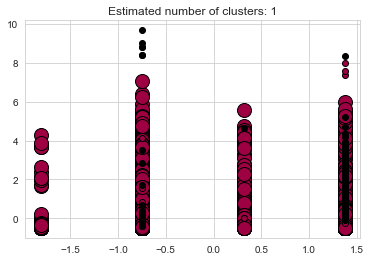

<Figure size 1440x720 with 0 Axes>

In [150]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
#X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
#                            random_state=0)

labels_true=y
#X = StandardScaler().fit_transform(X)

# Compute DBSCAN
db = DBSCAN(eps=2.5, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# Plot result
import matplotlib.pyplot as plt
%matplotlib inline

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.figure(figsize=(20,10))
plt.show()

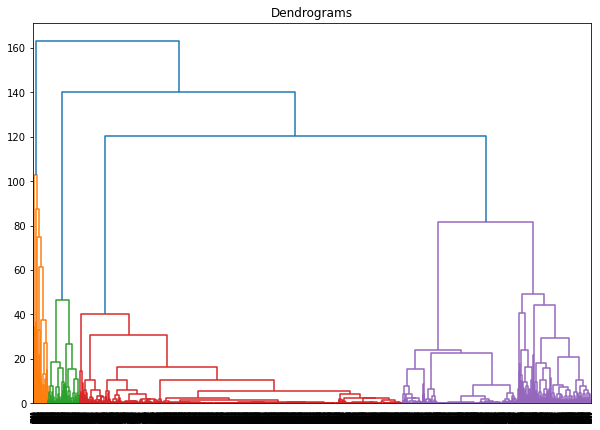

In [73]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

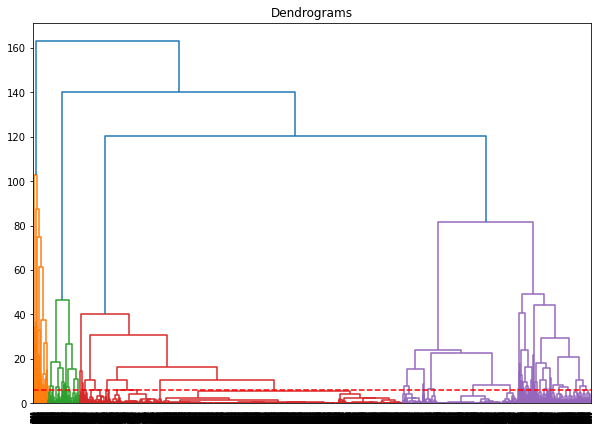

In [74]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [90]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X)

array([1, 3, 1, ..., 3, 3, 3], dtype=int64)

In [144]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
X_principal = pca.fit_transform(df_test)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2','P3','P4','P5','P6']
print(X_principal)


              P1          P2          P3         P4         P5        P6
0     553.474390   92.030454 -196.094168  11.477720  35.686366  0.655568
1    -141.050736  -94.699514   12.779167   0.925683  -2.450766 -0.421703
2      71.862787   53.402491  -17.240930   1.634408   5.652400  0.134307
3    -186.678450  -63.728504   12.133613   0.225657  -2.453719 -0.383780
4     -72.236168 -140.813518   10.479406  -4.212540   6.052356 -0.602677
...          ...         ...         ...        ...        ...       ...
7045 -212.417160  -46.257678   11.769454  -0.169229  -2.455384 -0.362388
7046 -298.928335   12.560082    9.987394  -2.867486  -1.542411 -0.152142
7047 -314.745587   23.266619    9.957972  -2.427384  -1.517710 -0.291094
7048  101.319812 -241.484466   -3.744903   9.169095  -4.353260 -0.664164
7049 -296.652940   10.919571   10.577661  -1.461584  -2.460836 -0.292378

[7050 rows x 6 columns]


In [ ]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

In [117]:
lower= df_subset.quantile(0.1)
upper= df_subset.quantile(0.99)
out_up= (df_subset > upper)
out_low = (df_subset < lower)
df_test = df_subset.mask(out_low, lower,axis=1)
df_test = df_subset.mask(out_up, lower,axis=1)

<AxesSubplot:>

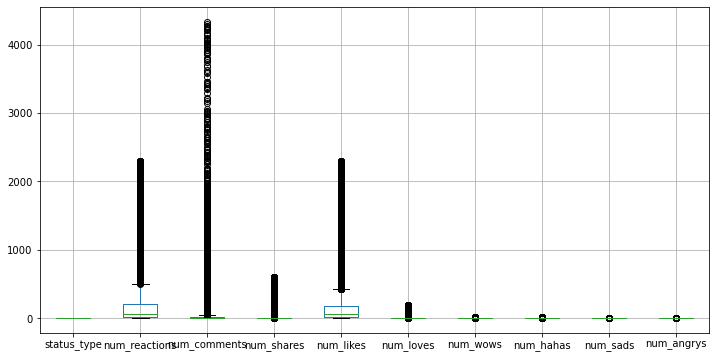

In [118]:
df_test.boxplot(figsize=(12,6))

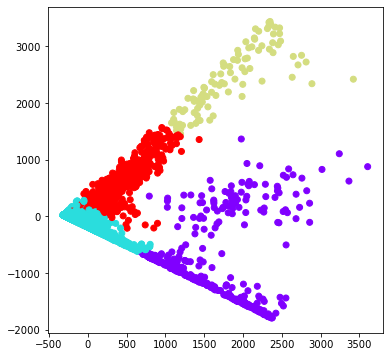

In [146]:
ac2 = AgglomerativeClustering(n_clusters = 4)
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac2.fit_predict(X_principal), cmap ='rainbow')
plt.show()

In [101]:
dist= []
k = [i for i in range(2,21)]
for num_cluster in k:
    kmeans = KMeans(n_clusters=num_cluster)
    kmeans.fit(X)
    dist.append(kmeans.inertia_)

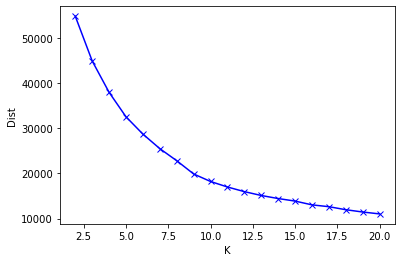

In [103]:
plt.plot(k,dist, 'bx-')
plt.xlabel('K')
plt.ylabel('Dist')
plt.show()

In [131]:
dist= []
k = [i for i in range(2,21)]
for num_cluster in k:
    kmeans = KMeans(n_clusters=num_cluster)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_,metric="euclidean")
    print("For K value{0},silhouette_score: {1}".format(num_cluster, score))

For K value2,silhouette_score: 0.7524998608054334
For K value3,silhouette_score: 0.6599201437948288
For K value4,silhouette_score: 0.5762326866870876
For K value5,silhouette_score: 0.5873370869347259
For K value6,silhouette_score: 0.5908126300950801
For K value7,silhouette_score: 0.5925471308871801
For K value8,silhouette_score: 0.593805213288889
For K value9,silhouette_score: 0.6019221396234015
For K value10,silhouette_score: 0.6041049735119614
For K value11,silhouette_score: 0.6142647350096051
For K value12,silhouette_score: 0.6161692264309151
For K value13,silhouette_score: 0.6194985656546207
For K value14,silhouette_score: 0.6237664623032902
For K value15,silhouette_score: 0.6205261552628367
For K value16,silhouette_score: 0.6198540760922456
For K value17,silhouette_score: 0.6208497540780448
For K value18,silhouette_score: 0.6290821986513309
For K value19,silhouette_score: 0.623596207807374
For K value20,silhouette_score: 0.630550843434749


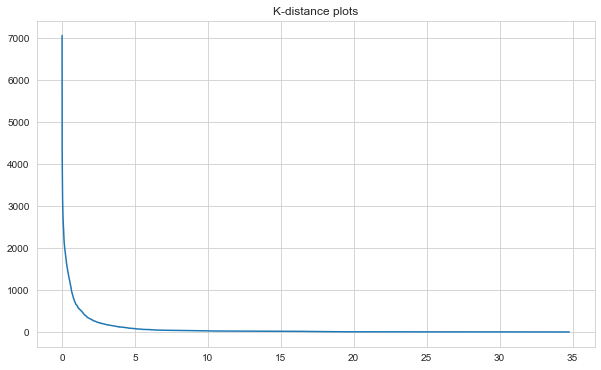

In [154]:
#estimate eps using knn-distance plot

from sklearn.neighbors import NearestNeighbors
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))

ns=10
nbrs= NearestNeighbors(n_neighbors=ns, algorithm='kd_tree').fit(X)
distances,indices = nbrs.kneighbors(X)
distanceDec = sorted(distances[:,ns-1],reverse=True)
plt.title('K-distance plots')
plt.plot(distanceDec,list(range(1,7050+1)))